<a href="https://colab.research.google.com/github/amrit-lal-singh/ML-Dl/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [3]:
img_1 = cv2.imread('img1.jpg')
img_2 = cv2.imread('img2.jpg')

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

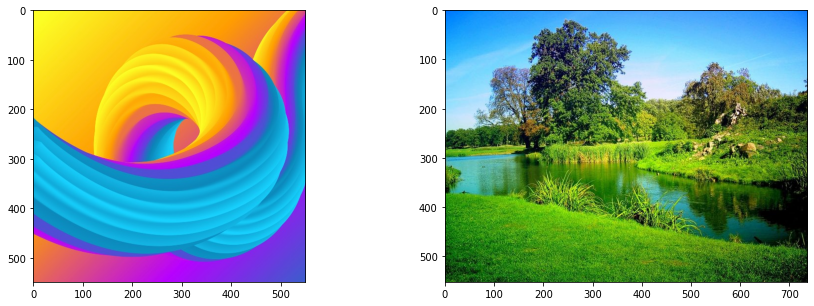

In [4]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_1)
plt.subplot(1, 2, 2)
plt.imshow(img_2)
plt.show()

In [5]:
def choose_random(K, vec):
    m = len(vec)
    idx = np.random.randint(0, m, K)
    return vec[idx]

def distortion(mu, c, vec):
    return ((mu[c] - vec) ** 2).sum() / vec.shape[0]

def distance(x_1, x_2):
    return np.matmul((x_1-x_2), (x_1-x_2).transpose())

def cluster_assignment(mu, vec):
    return ((vec - mu[:, np.newaxis]) ** 2).sum(axis=2).argmin(axis=0)

def move_centroid(mu, c, vec):
    for i in range(len(mu)):
        vec_sub = vec[c==i]
        mu[i] = np.mean(vec_sub, axis=0)
    return mu

def k_means(img, K, plot=True, verbose=False):
    l, w, ch = img.shape
    vec_img = img.reshape(-1, ch).astype(int)
    mu = choose_random(K, vec_img)
    c = cluster_assignment(mu, vec_img)
    last_dist = distortion(mu, c, vec_img) + 100
    curr_dist = last_dist - 100
    history = [curr_dist]
    while last_dist - curr_dist > 1:
        last_dist = curr_dist
        c = cluster_assignment(mu, vec_img)
        if verbose:
            print(curr_dist)
        mu = move_centroid(mu, c, vec_img)    
        curr_dist = distortion(mu, c, vec_img)
        history.append(curr_dist)
    if plot:
        img_compressed = mu[c].reshape(img.shape)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title('original image')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(img_compressed)
        plt.title('compressed image')
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.plot(range(len(history)), history)
        plt.title('distortion over iterations')
        plt.xlabel('iterations')
        plt.ylabel('distortion')
    return mu, c, history[-1]

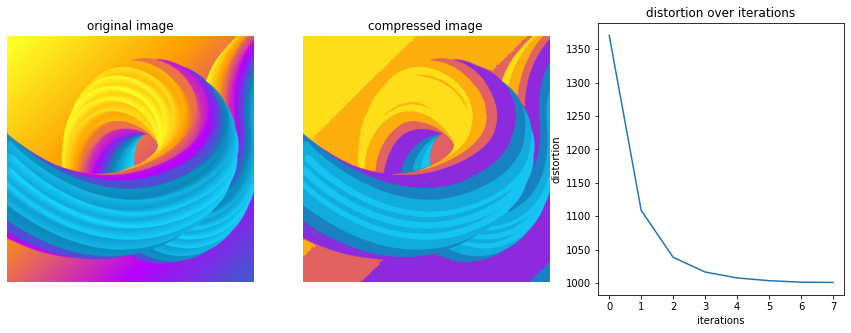

In [10]:
mu, c, dist = k_means(img_1, 7)

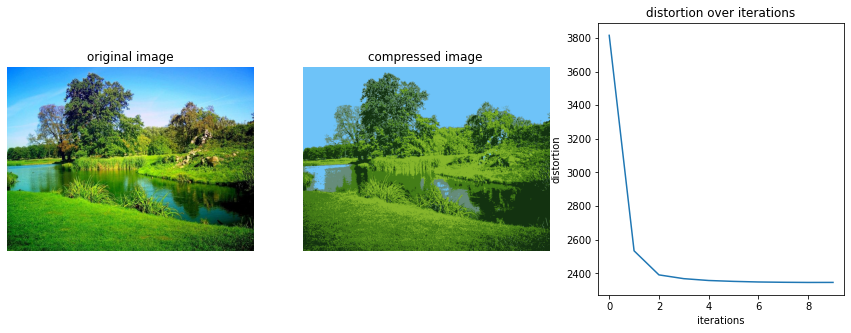

In [7]:
mu, c, dist = k_means(img_2, 5)

In [8]:
def elbow(img):
    K_hist = []
    dist_hist = []
    for K in tqdm(range(1, 10)):
        K_hist.append(K)
        mu, c, dist = k_means(img, K, plot=False)
        dist_hist.append(dist)
    plt.plot(K_hist, dist_hist)
    plt.xlabel("K")
    plt.ylabel("final distortion")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Text(0.5, 1.0, 'elbow plot of image 2')

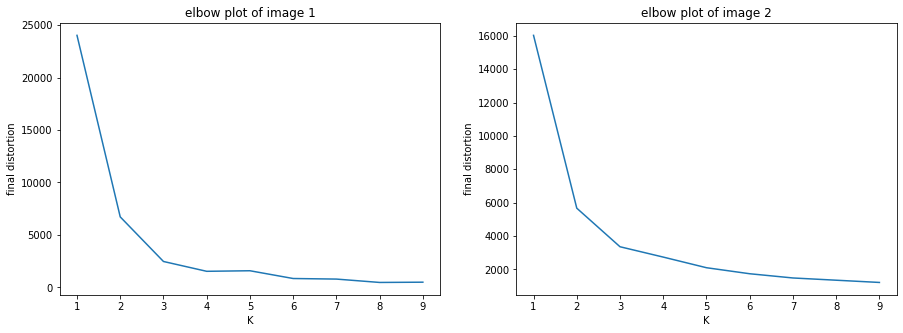

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('elbow plot of image 1')
elbow(img_1)
plt.subplot(1, 2, 2)
elbow(img_2)
plt.title('elbow plot of image 2')